In [1]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import zscore

In [2]:
df=pd.read_csv('happiness_score_dataset.csv')
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


Let's know about our dataset before proceeding further : Regression model
* The first column is a collection of countries for which happiness score is given based on other components.

* Second column is a particular region which defines in which region what is the happiness score which is based on various independent variables.

* Third column is our rank for countires having high to low happiness score this column may not contribute in rediction which we'll check in further analysis.

* Fourth column is all about happiness score which is our target variable in this dataset.

* Fifth one is standard error which is most mportant column in this dataset as it defines variability of reported happiness score which will be helpful for us in predicting happiness score.

* Sixth column defines per capita income which can be a major imact on happiness date as in general it may have postive correlation with happiness score, rest we'll check with our analysis.

* seventh is family, which will help us to predict how family support will affect our happiness score.

* Eighth one is health or we can say life expectancy, which could be a major impact on happiness data as health is a valuable assest and in general it may have a positive correlation with happiness score, rest we'll see through our analysis. 

* Ninth is freedom thrugh which we can predit that how freedom is affecting happiness score for an individual.

* Tenth is corruption which will be playing a major role in happiness data and it'll be having a negative correlation with happiness score, rest we'll check it with our analysis.

* Eleventh is Generosity, which will help us to predict that how a charitable behaviour can affect happiness score.

* And the final one is a dystopia residual, this column is containing extreme unhappy factor which will help us to compare and understand how the other factors are working.

In [3]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


Here we can see first 5 rows of our dataset in which Top 5 countries and affecting factors are there in which we can see that which factor should be high and which should be low for high happiness score and we will understand this better through our analysis.

In [4]:
df.tail()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


It is just opposite from the first 5 rows as here we can see last  5 rows of our dataset in which bottom 5 countries and affecting factors are there in which we can see that which factor should be high and which should be low for high happiness score and we will understand this better through our analysis.

In [6]:
df.shape

(158, 12)

We can see that we are having 158 rows and 12 columns in our dataset, an all the 12 columns has been explained above, by which we can be sure that we are not missing any factor affecting happiness score.

In [10]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [ ]:
Here are names of all the columns which has been defined above.

In [14]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [15]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

We can see that we do not have any null values in our dataset which is a very good point for us as we o not have much data to loss and we can not bear dataloss in this dataset.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

By info we can analys that we have total 158 in which all the rrows are havg not null values this means we does not have any null value in our dataset also we will do treatment of datatype further as per our need for predicting happiness score.

<Axes: >

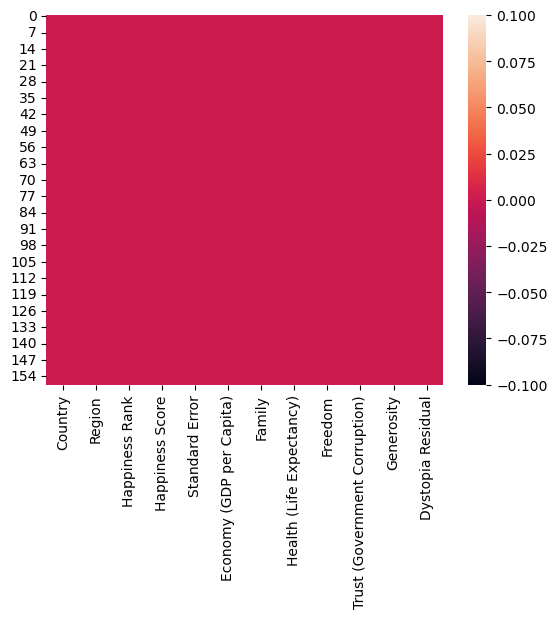

In [17]:
sns.heatmap(df.isnull())

With the help of above heatmap also we can see that we do not have any null value in our dataset as the colour of whole heatmap is near to the 0.00 value.

In [18]:
df.nunique().to_frame("Unique values")

,Unique values
Country,158
Region,10
Happiness Rank,157
Happiness Score,157
Standard Error,153
Economy (GDP per Capita),158
Family,158
Health (Life Expectancy),157
Freedom,158
Trust (Government Corruption),157


With the help of above data we can see that we have most of the columns with unique values that is because each factor uis affecting differently for the happiness score and most of the columns are having float data.
We can nly see 10 unique values in Region column as it does not have to many components and having nly 10 regions in total.

In [19]:
df.duplicated().sum()

0

We can see that we do not have a single duplicated row, which is beneficial for us as we can not bear dataloss in such a small dataset.

In [21]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


Following is the complete analysis of data in which we can see that our data is absolutely perfect as we are not getting any negative value.

 Here are some observation as per above date.

* We can see that the count of all columns are same it means our data is perfect and ready to work with.
* We can see that there is not too much difference in mean and median of any column this means our data is not skewed it is   just Economy column having a minor left skweness as median is greater than mean, which can be affordable.
* By analysing the data we can not see a huge difference between 75th percentile and maximum value this means there is low chances of having outliers in our dataset, and is it have any then that can be treated by simle Z score method. 
* By analysing data we can see that happiness rank is not playing any role in happiness score so let us drop that column.

In [12]:
df.drop(columns=['Happiness Rank'], inplace=True)

In [9]:
df.corr()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Score,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


By the above analysis we can see that Economy, family and health column have high positive correlation with happiness score which may cause multicollenearity issue and we need to do treatment of this before training our data. 
Also Economy and health are also having high positivee correlation which needs to be treated.

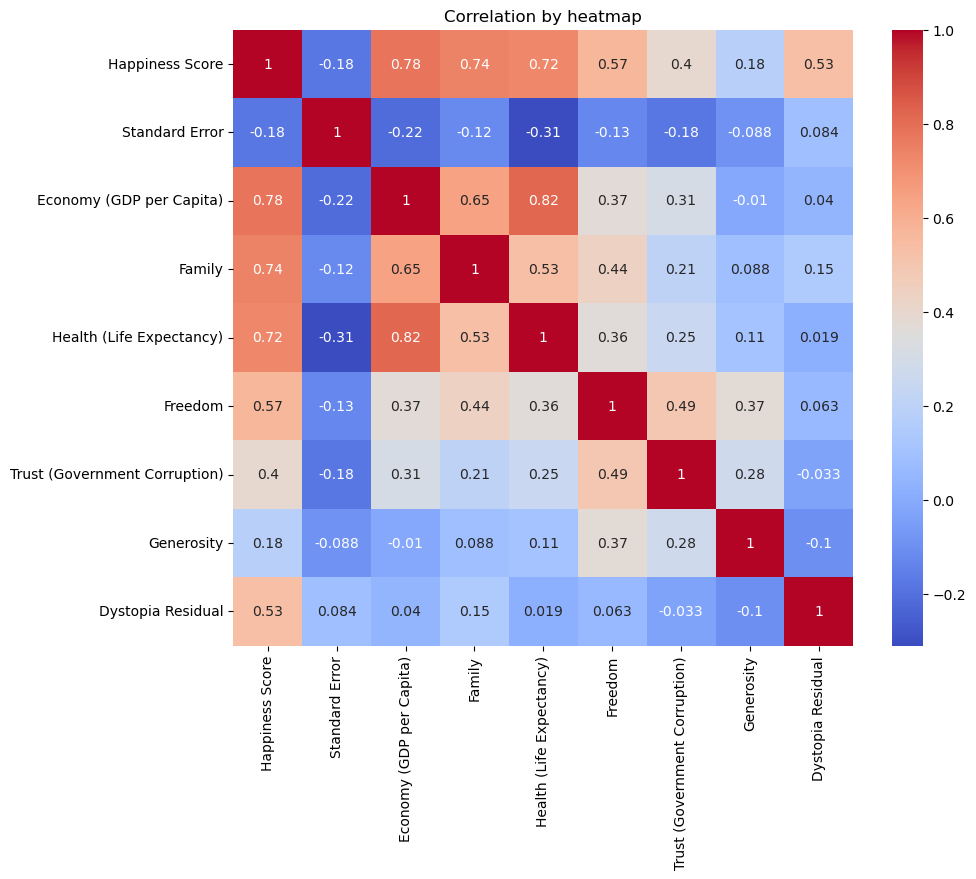

In [11]:
correlation = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation by heatmap')
plt.show()

We can also see it with the help of heatmap in which values close to 1 or -1 indicate strong correlations, while values close to 0 indicate weak or no correlation, also we can see it through colour as blue colour shows less correlation between 2 columns.
* As per above analysis it is better to drop health(life expectancy) column from our data to make sure it could perform better. the reason to drop health is because it is having positive correlation with 2 variables that is happiness score and economy and rest are having with one beecause of which I choosed to drop health.

In [7]:
#Let us drop Health column
df.drop(columns=['Health (Life Expectancy)'], inplace=True)

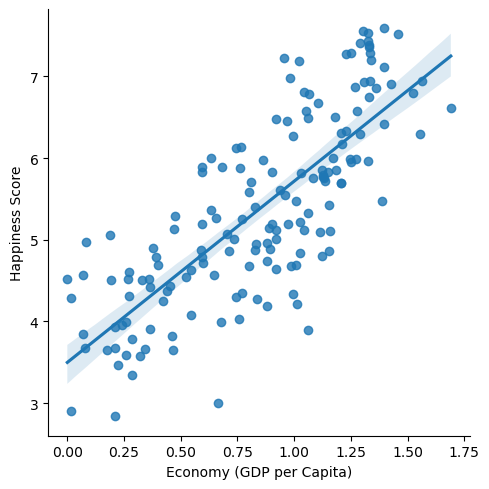

In [16]:
sns.lmplot(x='Economy (GDP per Capita)',y='Happiness Score',data=df,palette='colorblind')

We can also see with the help of individual plot that economy have a positive correlation with happiness score.

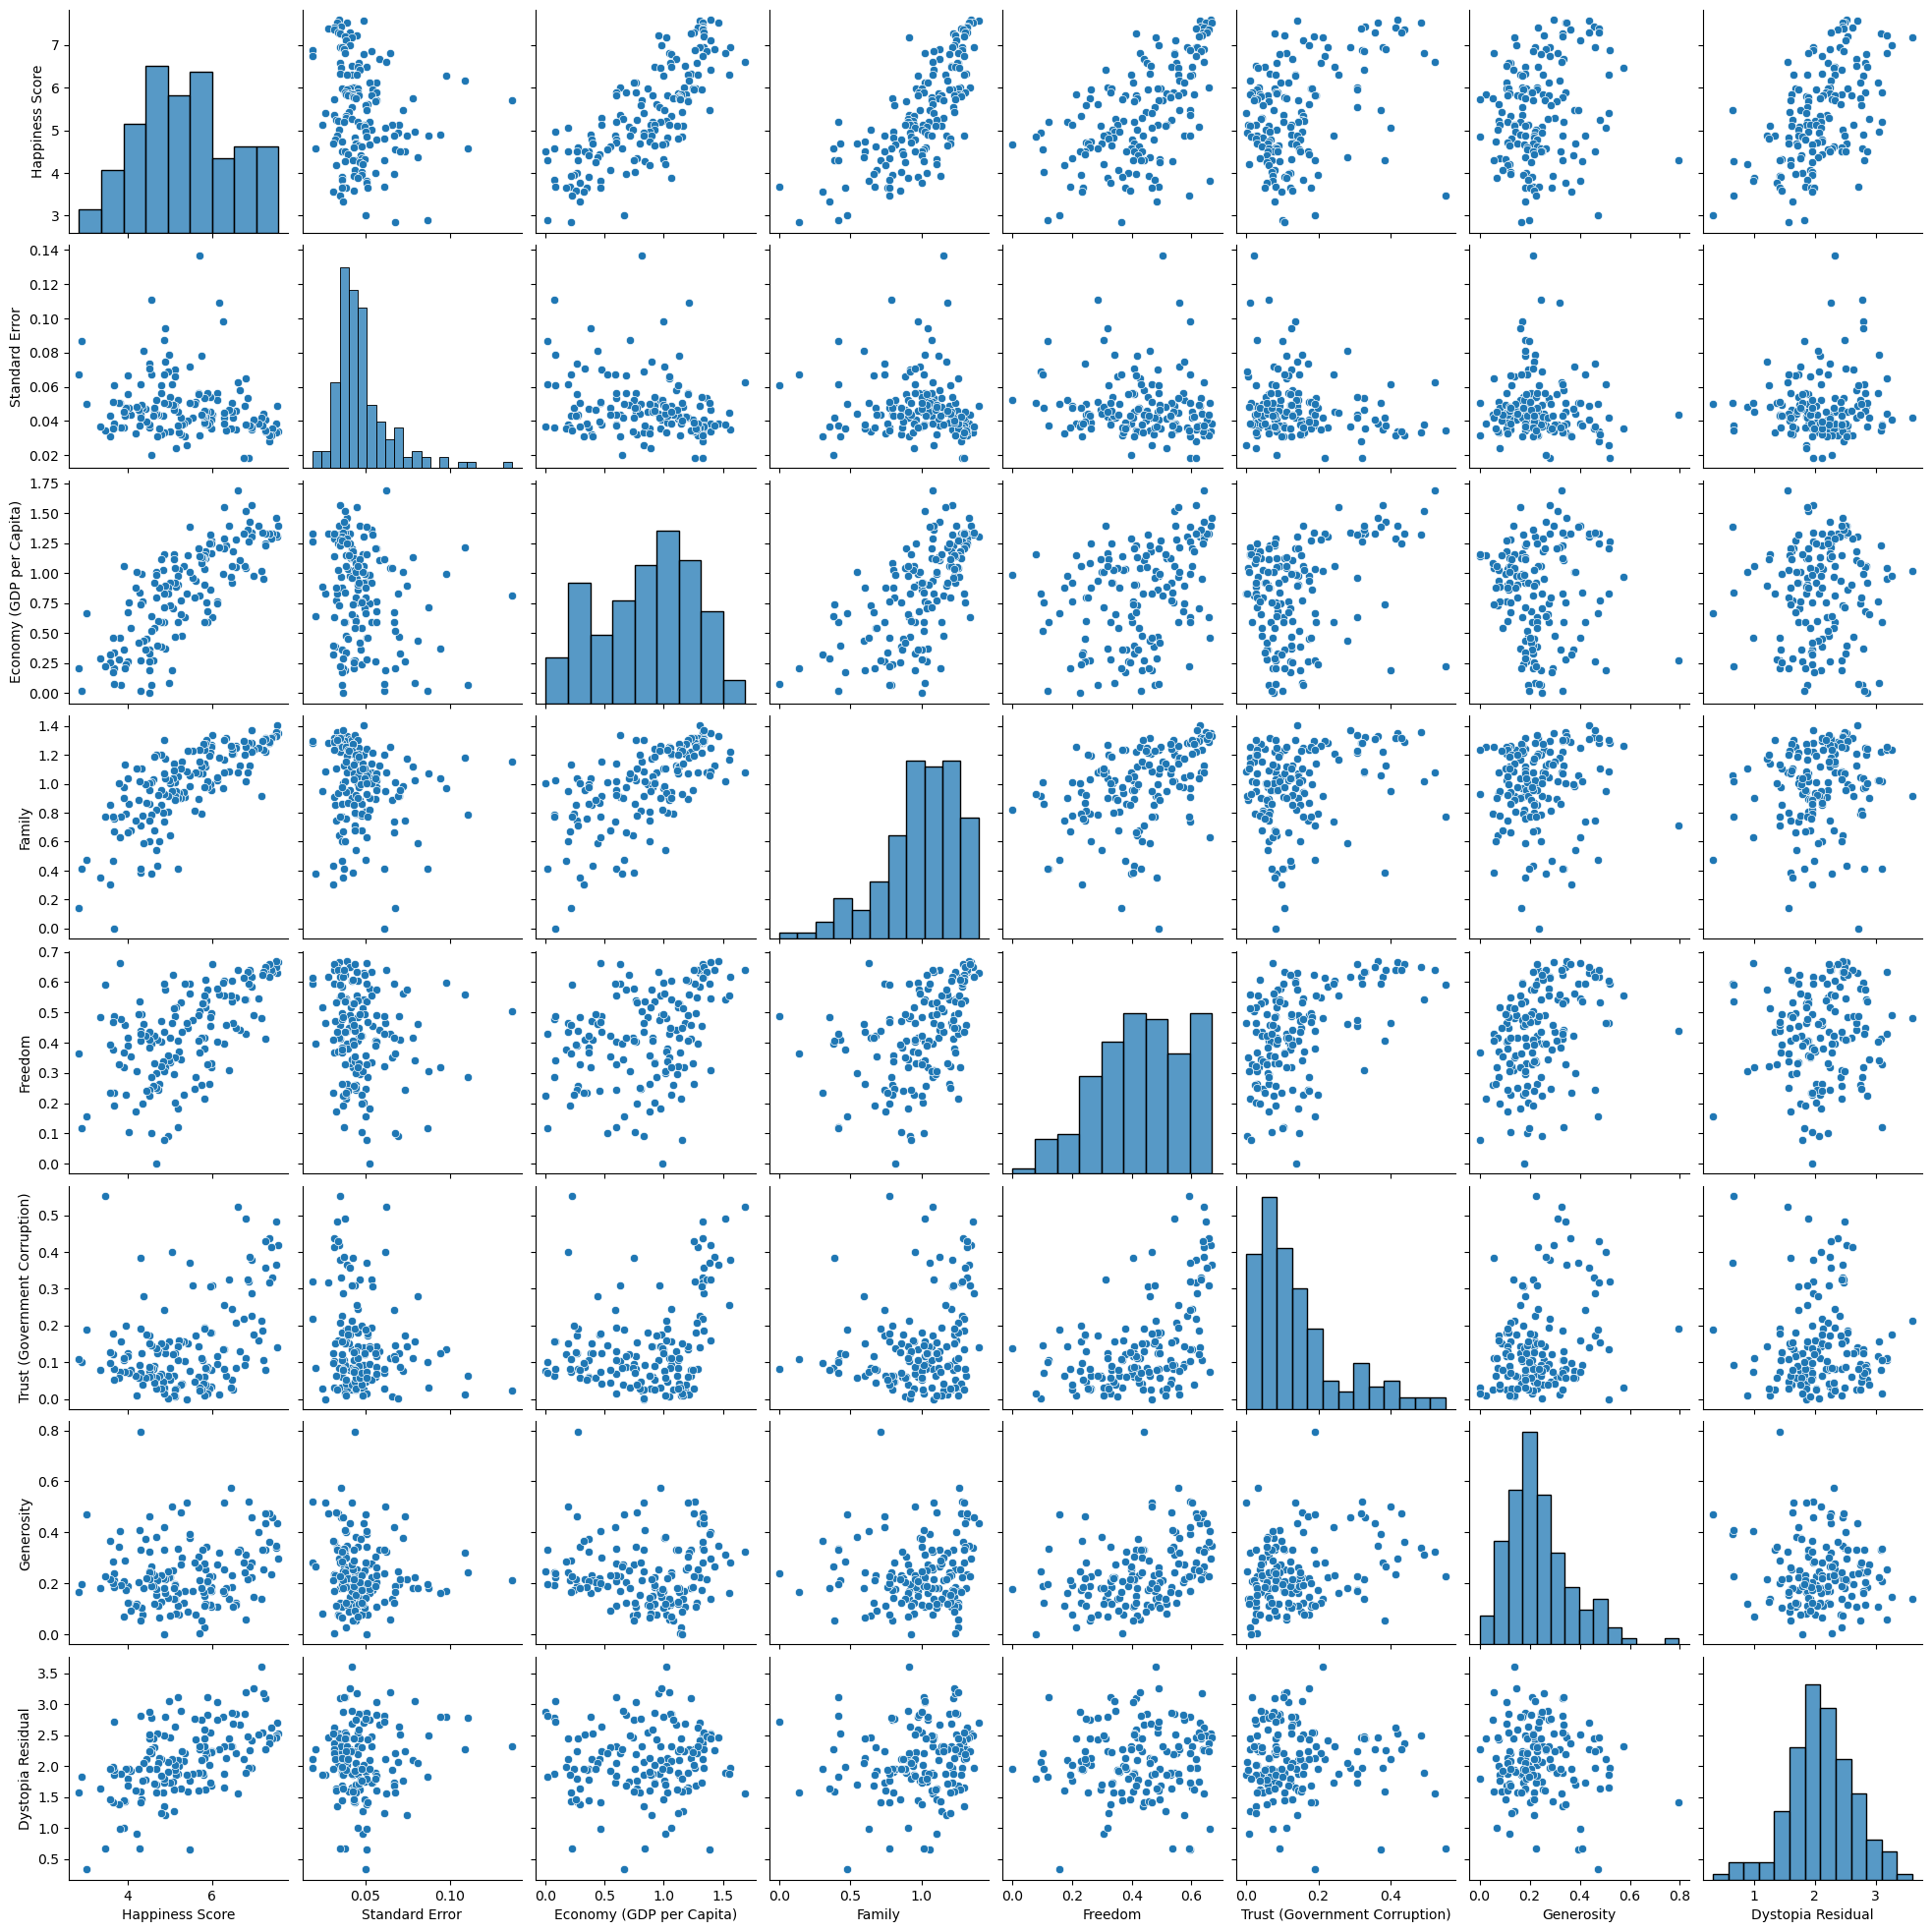

In [17]:
sns.pairplot(data=df,palette="dark1")

With the analysis of scatter plots we have got through this pair plot, we can say that economy family and freedom are having a good positive correlation with happiness score which will be helpful for us in training our model and predicting the data.
We can als see that we are having outliers in somee of our columns.
As the data is too much scattered we will try to use linear regression however if it would not work properly we would also go for Decision tree and Random forest.

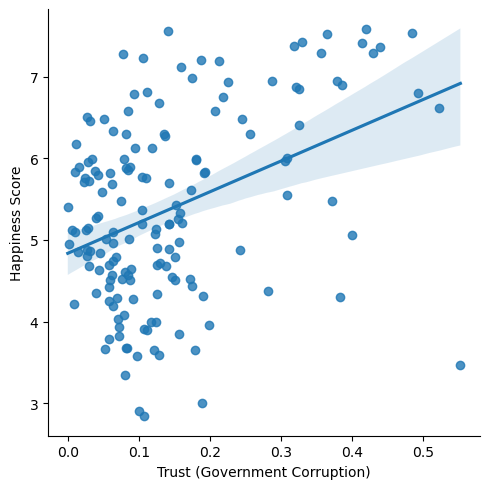

In [5]:
sns.lmplot(x='Trust (Government Corruption)',y='Happiness Score',data=df,palette='colorblind')

By the above graph can not show relation between 2 variable however we can see that we have outliers in this column which needs to be treated.

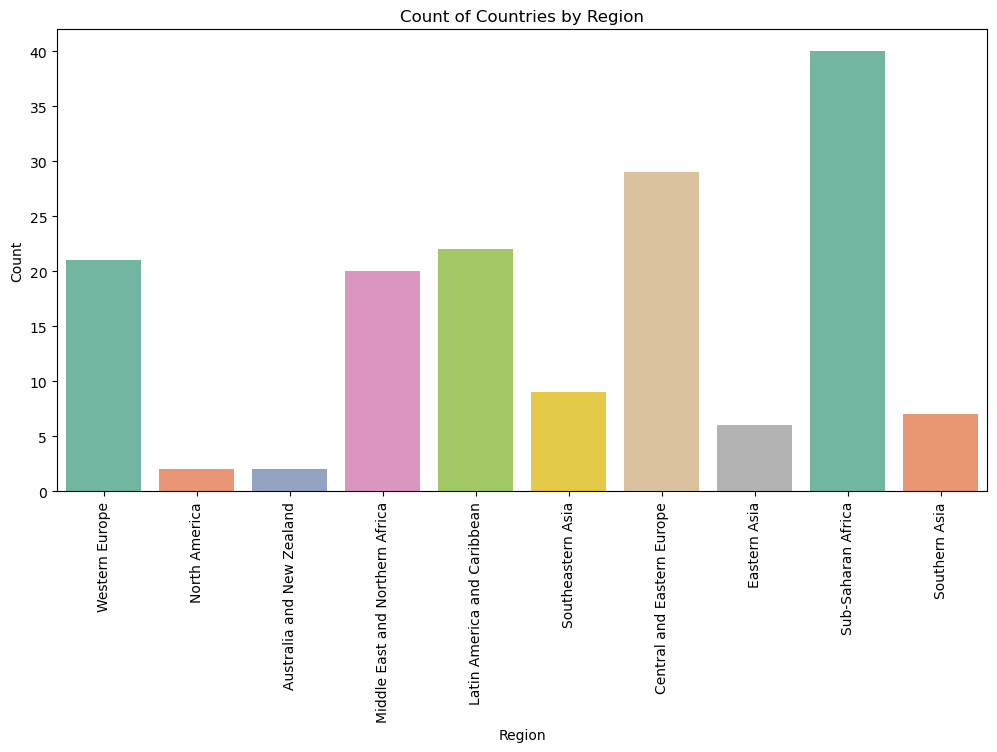

In [13]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Region', palette='Set2')
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Count of Countries by Region')
plt.show()

With the help of above graph we can analys that in which region most of countris are coming with high happiness score.

(array([1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(1, 0, 'Happiness Score'),
  Text(2, 0, 'Standard Error'),
  Text(3, 0, 'Economy (GDP per Capita)'),
  Text(4, 0, 'Family'),
  Text(5, 0, 'Freedom'),
  Text(6, 0, 'Trust (Government Corruption)'),
  Text(7, 0, 'Generosity'),
  Text(8, 0, 'Dystopia Residual')])

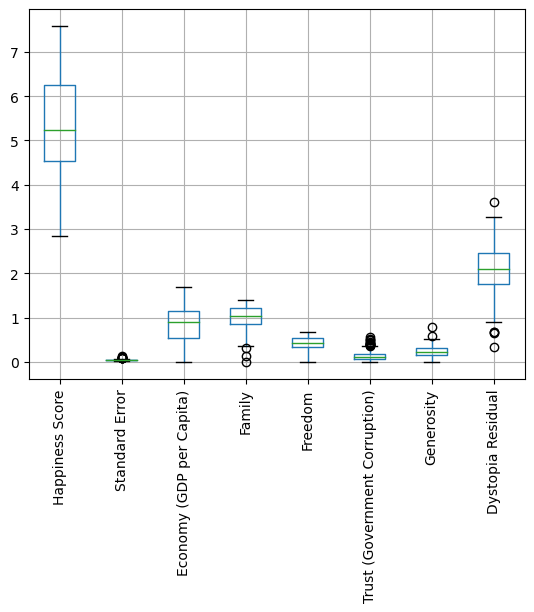

In [23]:
df.boxplot()
plt.xticks(rotation=90)

With the help of above box plot we can see that we have outlier in only one column that is Dystopia Residual rest all the columns are not having outlier's and we'll check it through z-score method.

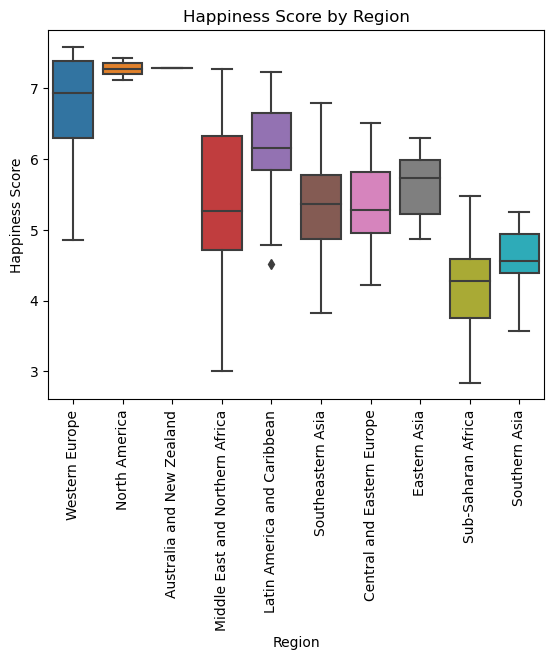

In [26]:
#Now let's check outlier's by plotting a box plot for Region wise data.
sns.boxplot(x='Region', y='Happiness Score', data=df)
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Happiness Score')
plt.title('Happiness Score by Region')
plt.show()

In [14]:
#Let's find outlier with Zscore method
outliers=df[['Dystopia Residual']]
z=np.abs(zscore(outliers))
z

,Dystopia Residual
0,0.758258
1,1.092857
2,0.712335
3,0.663893
4,0.639337
...,...
153,2.588925
154,0.843967
155,3.208430
156,0.481985


In [15]:
np.where(z>3)

(array([155], dtype=int64), array([0], dtype=int64))

We have only detected one outlier in our dataset, let us also remove it to make sure we get more accurate prediction of our data.

In [16]:
df1=df[(z<3).all(axis=1)]

In [17]:
df1.shape

(157, 10)

We can see that one row has been entirely removed as it has outliers, now we can proceed to tain our model.

In [33]:
df1.skew()

Happiness Score                  0.120571
Standard Error                   1.980140
Economy (GDP per Capita)        -0.325374
Family                          -1.031116
Freedom                         -0.421640
Trust (Government Corruption)    1.390063
Generosity                       1.026624
Dystopia Residual               -0.094596
dtype: float64

We can see that Standard Error, Family, Trust (Government Corruption), and Generosity are skewed data, and we have to do treatment for them.

In [16]:
# let's use cube root methos to remove skewness from our data
df1['Standard Error']=np.cbrt(df1['Standard Error'])
df1['Trust (Government Corruption)']=np.cbrt(df1['Trust (Government Corruption)'])
df1['Generosity']=np.cbrt(df1['Generosity'])

In [17]:
df1.skew()

Happiness Score                  0.120571
Standard Error                   0.982131
Economy (GDP per Capita)        -0.325374
Family                          -1.031116
Freedom                         -0.421640
Trust (Government Corruption)    0.022411
Generosity                      -0.971440
Dystopia Residual               -0.094596
dtype: float64

We can see that we have removed skewness from all the data however it is increased in Family column, so let us now use log method.

In [19]:
df1['Family']=np.square(df1['Family'])

In [20]:
df1.skew()

Happiness Score                  0.120571
Standard Error                   0.982131
Economy (GDP per Capita)        -0.325374
Family                          -0.261510
Freedom                         -0.421640
Trust (Government Corruption)    0.022411
Generosity                      -0.971440
Dystopia Residual               -0.094596
dtype: float64

We can see that now we have successfully treated skewennes from our data and as now outliers and skewness has been removed ao we have done treatment of high correlation to avoid multicollenarity issue so now our data is ready to work in machine learning model let us split and fit our data.
The final thing ending is to encode our catagorical columns into numerical value to fir them into our model let us work on that.

In [21]:
df1.head()

,Country,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,7.587,0.324310,1.39651,1.821177,0.66557,0.748756,0.667029,2.51738
1,Iceland,Western Europe,7.561,0.365532,1.30232,1.966249,0.62877,0.521036,0.758453,2.70201
2,Denmark,Western Europe,7.527,0.321658,1.32548,1.851178,0.64938,0.784910,0.698903,2.49204
3,Norway,Western Europe,7.522,0.338540,1.45900,1.771428,0.66973,0.714677,0.702704,2.46531
4,Canada,North America,7.427,0.328749,1.32629,1.749297,0.63297,0.690742,0.770886,2.45176


In [22]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [23]:
df1['Country'] = label_encoder.fit_transform(df1['Country'])

In [24]:
df1['Region'] = label_encoder.fit_transform(df1['Region'])

In [25]:
df1

,Country,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,7.587,0.03411,1.39651,1.34951,0.66557,0.41978,0.29678,2.51738
1,58,9,7.561,0.04884,1.30232,1.40223,0.62877,0.14145,0.43630,2.70201
2,37,9,7.527,0.03328,1.32548,1.36058,0.64938,0.48357,0.34139,2.49204
3,105,9,7.522,0.03880,1.45900,1.33095,0.66973,0.36503,0.34699,2.46531
4,24,5,7.427,0.03553,1.32629,1.32261,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...
152,0,7,3.575,0.03084,0.31982,0.30285,0.23414,0.09719,0.36510,1.95210
153,118,8,3.465,0.03464,0.22208,0.77370,0.59201,0.55191,0.22628,0.67042
154,13,8,3.340,0.03656,0.28665,0.35386,0.48450,0.08010,0.18260,1.63328
156,21,8,2.905,0.08658,0.01530,0.41587,0.11850,0.10062,0.19727,1.83302


Here we go - 
Everyting has been done which we need to do in datapreprocessing let's Summarize.
* First we have imported our dataset and understod different components and factor affeting our target variable.
* We've done different kinds of non grahical EDA to get more insights from dataset.
* Then we went for graphical analysis of our data which helped us to get more visualised information and insights.
* After which we came to data preprocessing in which we've checked outliers by box plot and removed it with the help of Z score method.
* After which we've checked for skewness in our data and also removed it by cuberoot and square method available in numpy.
* As a final stpe we've changed our catagorical columns into numerical to fit them in our model and work with them.
* now lets split and fit values to get result by checking different models.

In [26]:
#Let's split our data in features and target first then we will keep it in X and Y variable

features = ['Economy (GDP per Capita)', 'Family','Country', 'Region','Standard Error', 'Freedom','Trust (Government Corruption)','Generosity','Dystopia Residual']
target = 'Happiness Score'

In [27]:
x = df1[features]
y = df1[target]

In [28]:
print('dimension of indendent variable:',x.shape)
print('dimension of dependent variable:',y.shape)

dimension of indendent variable: (157, 9)
dimension of dependent variable: (157,)


We can see that our features varibale that is X is having 157 rows and 9 column, and target variable that is Y is also having 157 rows however only 1 column that is happiness score beecause it is our target variable, which means we are going good till now, let's find best random state now after importing neccessary libraries.

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [30]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size =0.30, random_state = i)
    lr=LinearRegression()
    lr.fit(x_train, y_train)
    pred= lr.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i
print("maximum r2 score is ", maxAccu,"on Randome_state",maxRS)        

maximum r2 score is  0.9949268257584676 on Randome_state 0


In [31]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size =0.30, random_state = maxRS)

In [32]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_DTR=dtr.predict (x_test)
pred_train=dtr.predict(x_train)
print ('R2 score:',r2_score(y_test,pred_DTR))
print ('R2 score on training Data:',r2_score(y_train,pred_train) *100)
print('Mean Absolute Error:',mean_absolute_error(y_test, pred_DTR))
print('Mean Squared Error:',mean_squared_error(y_test, pred_DTR))
print ("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test, pred_DTR)))

R2 score: 0.7920821852572515
R2 score on training Data: 100.0
Mean Absolute Error: 0.37766666666666654
Mean Squared Error: 0.21010908333333325
Root Mean Squared Error: 0.4583765737178693


In [35]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
pred_RFR=rfr.predict (x_test)
pred_train=rfr.predict(x_train)
print ('R2 score:',r2_score(y_test,pred_RFR))
print ('R2 score on training Data:',r2_score(y_train,pred_train) *100)
print('Mean Absolute Error:',mean_absolute_error(y_test, pred_RFR))
print('Mean Squared Error:',mean_squared_error(y_test, pred_RFR))
print ("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test, pred_RFR)))

R2 score: 0.9104683959426789
R2 score on training Data: 98.5225494081127
Mean Absolute Error: 0.2515270833333339
Mean Squared Error: 0.09047518742500034
Root Mean Squared Error: 0.30079093640766563


We can see that we are getting much better accuracy with Random forest model as compare to decision tree, let's also check other model and see which model is woring best for us.

In [36]:
from sklearn.ensemble import ExtraTreesRegressor
etr=ExtraTreesRegressor()
etr.fit(x_train,y_train)
pred_ETR=etr.predict (x_test)
pred_train=etr.predict(x_train)
print ('R2 score:',r2_score(y_test,pred_ETR))
print ('R2 score on training Data:',r2_score(y_train,pred_train) *100)
print('Mean Absolute Error:',mean_absolute_error(y_test, pred_ETR))
print('Mean Squared Error:',mean_squared_error(y_test, pred_ETR))
print ("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test, pred_ETR)))

R2 score: 0.9302530404271784
R2 score on training Data: 100.0
Mean Absolute Error: 0.20134791666666682
Mean Squared Error: 0.07048203040833328
Root Mean Squared Error: 0.2654845200917245


Great! we are getting more accuracy with extra tree regressor and it is even more than Random forest

Let's also check Gradient booster and KNN model

In [37]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
pred_GBR=gbr.predict (x_test)
pred_train=gbr.predict(x_train)
print ('R2 score:',r2_score(y_test,pred_GBR))
print ('R2 score on training Data:',r2_score(y_train,pred_train) *100)
print('Mean Absolute Error:',mean_absolute_error(y_test, pred_GBR))
print('Mean Squared Error:',mean_squared_error(y_test, pred_GBR))
print ("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test, pred_GBR)))

R2 score: 0.9222773470306518
R2 score on training Data: 99.93216581499979
Mean Absolute Error: 0.21356841066032253
Mean Squared Error: 0.07854178050990737
Root Mean Squared Error: 0.2802530651213424


We can see we are getting less accuracy with Gradient boosting.

In [45]:
from sklearn.linear_model import Ridge
rd= Ridge()
rd.fit(x_train,y_train)
pred_RD=rd.predict (x_test)
pred_train=rd.predict(x_train)
print ('R2 score:',r2_score(y_test,pred_RD))
print ('R2 score on training Data:',r2_score(y_train,pred_train) *100)
print('Mean Absolute Error:',mean_absolute_error(y_test, pred_RD))
print('Mean Squared Error:',mean_squared_error(y_test, pred_RD))
print ("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test, pred_RD)))

R2 score: 0.9737499682730543
R2 score on training Data: 98.29745637434051
Mean Absolute Error: 0.12055312659756408
Mean Squared Error: 0.026526683682413205
Root Mean Squared Error: 0.16287014361881433


We've checked so many models here and as a conclusion we can see that we are getting highest accuracy rate in Ridge let's also check this accuracy by cross validation method.

In [46]:
from sklearn.model_selection import cross_val_score

In [54]:
score = cross_val_score(dtr,x,y, cv=5, scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is :", (r2_score(y_test,pred_DTR)-score.mean()*100))

[ -8.69872996 -10.85506145  -7.12527209 -14.35237083  -6.22764071]
-9.451815009327614
Difference between R2 score and cross validation score is : 945.9735831180187


In [59]:
score = cross_val_score(rfr,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is :", (r2_score(y_test,pred_RFR)-score.mean()*100))

[-8.48946606 -1.71835064 -1.48128567 -3.59450836 -5.8606509 ]
-4.228852325692641
Difference between R2 score and cross validation score is : 423.7957009652068


In [58]:
score = cross_val_score(etr,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is :", (r2_score(y_test,pred_ETR)-score.mean()*100))

[-7.52178760e+00  3.96221355e-03 -1.29807325e+00 -3.05619745e+00
 -4.99286534e+00]
-3.3729922852963425
Difference between R2 score and cross validation score is : 338.22948157006147


In [57]:
score = cross_val_score(gbr,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is :", (r2_score(y_test,pred_GBR)-score.mean()*100))

[-4.26485627 -0.59681899 -2.14175121 -2.5808189  -3.73539454]
-2.663927979181476
Difference between R2 score and cross validation score is : 267.3150752651783


In [61]:
score = cross_val_score(rd,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is :", (r2_score(y_test,pred_RD)-score.mean()*100))

[-0.56035318  0.7113514   0.69081344 -0.34117808  0.50231748]
0.2005902122590789
Difference between R2 score and cross validation score is : -19.085271257634833


We can see that our prediction is working well in Ridge model and able to predict best data.

In [62]:
#Lets test our data by grid search
from sklearn.model_selection import GridSearchCV

In [66]:
param={'alpha':[1.0,.05,.4,2],'fit_intercept':[True,False],
       'solver':['auto','svd','cholesky','lsqr','sag','lbfgs'],
       'positive':[False,True],
       'random_state':[1,4,10,20]}
gscv=GridSearchCV(Ridge(),param,cv=5)
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1.0, 0.05, 0.4, 2],
                         'fit_intercept': [True, False],
                         'positive': [False, True],
                         'random_state': [1, 4, 10, 20],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sag',
                                    'lbfgs']})

In [67]:
gscv.best_params_

{'alpha': 0.05,
 'fit_intercept': True,
 'positive': False,
 'random_state': 1,
 'solver': 'auto'}

In [68]:
Model=Ridge(alpha=0.05,fit_intercept=True,positive=False,random_state=1,solver='auto')

In [69]:
Model.fit(x_train,y_train)
pred=Model.predict (x_test)
print ('R2 score:',r2_score(y_test,pred))
print('Mean Absolute Error:',mean_absolute_error(y_test, pred))
print('Mean Squared Error:',mean_squared_error(y_test, pred))
print ("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test, pred)))

R2 score: 0.9815946095520713
Mean Absolute Error: 0.09998088808593632
Mean Squared Error: 0.018599366870948947
Root Mean Squared Error: 0.13637949578638625


We can see that at the final stage ur model is giving accuracy of 98 which can be considered as an excellent accuracy score.

Now let's save our model by pickle method

In [70]:
import pickle
filename='World hapiness.pkl'
pickle.dump(Model,open(filename,'wb'))

We've already saved our work with above code let's reopen the model and check accuracy score

In [72]:
Load_model=pickle.load(open('World hapiness.pkl','rb'))
result=Load_model.score(x_test,y_test)
print(result*100)

98.15946095520714


We can see our accuracy score above, let's also check prediction of our model manually.

In [74]:
Conclusion=pd.DataFrame([Load_model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

In [75]:
Conclusion

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
Predicted,7.298683,6.070868,4.965236,4.570764,5.857195,4.686376,4.354801,5.416173,4.470066,4.816769,...,3.258644,5.063229,6.869532,4.675173,5.203084,5.074998,6.822896,5.818033,6.50585,3.824014
Original,7.364000,5.995000,4.642000,4.517000,5.716000,4.633000,4.514000,5.474000,4.694000,4.949000,...,3.465000,4.971000,6.611000,4.681000,5.194000,5.073000,6.937000,5.754000,6.50500,3.667000
